In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 查看数据

In [2]:
#读取训练数据，原表格全部都放在了一列上，所以要加sep=' '
train = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')

In [3]:
train.shape      #多一行price，即我们要预测的目标

(150000, 31)

In [4]:
test.shape

(50000, 30)

In [5]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [7]:
#查看数据及分布情况,train.describe()默认是数值型变量，include='all'则表示加上离散型变量
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
test.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [11]:
#查看缺失值和异常值情况
train.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

四项缺失，数据缺失情况：model: 1, bodyType: 4506, fuelType: 8680, gearbox: 5981

In [12]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

三项缺失，数据缺失情况：bodyType: 1504, fuelType: 2924, gearbox: 1968

In [13]:
#缺失值的可视化
missing = train.isnull().sum()
missing.index

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [14]:
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing_sorted = missing/150000
missing_sorted  

model       0.000007
bodyType    0.030040
gearbox     0.039873
fuelType    0.057867
dtype: float64

Text(0, 0.5, 'isnull ratio')

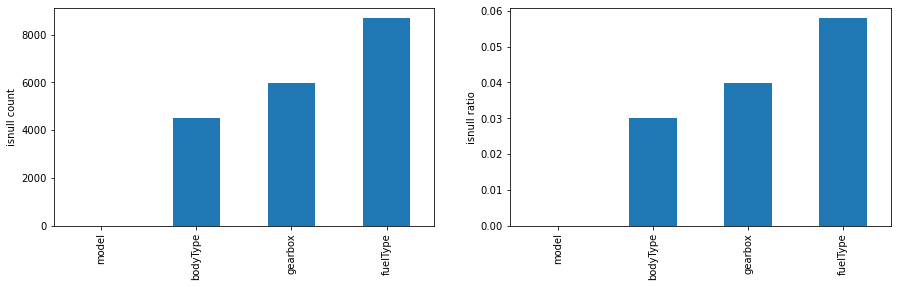

In [15]:
#查看缺失值以及缺失比例
plt.figure(figsize=(15, 4))
plt.subplot(121)
missing.plot.bar()
plt.ylabel('isnull count')

plt.subplot(122)
missing_sorted.plot.bar()
plt.ylabel('isnull ratio')

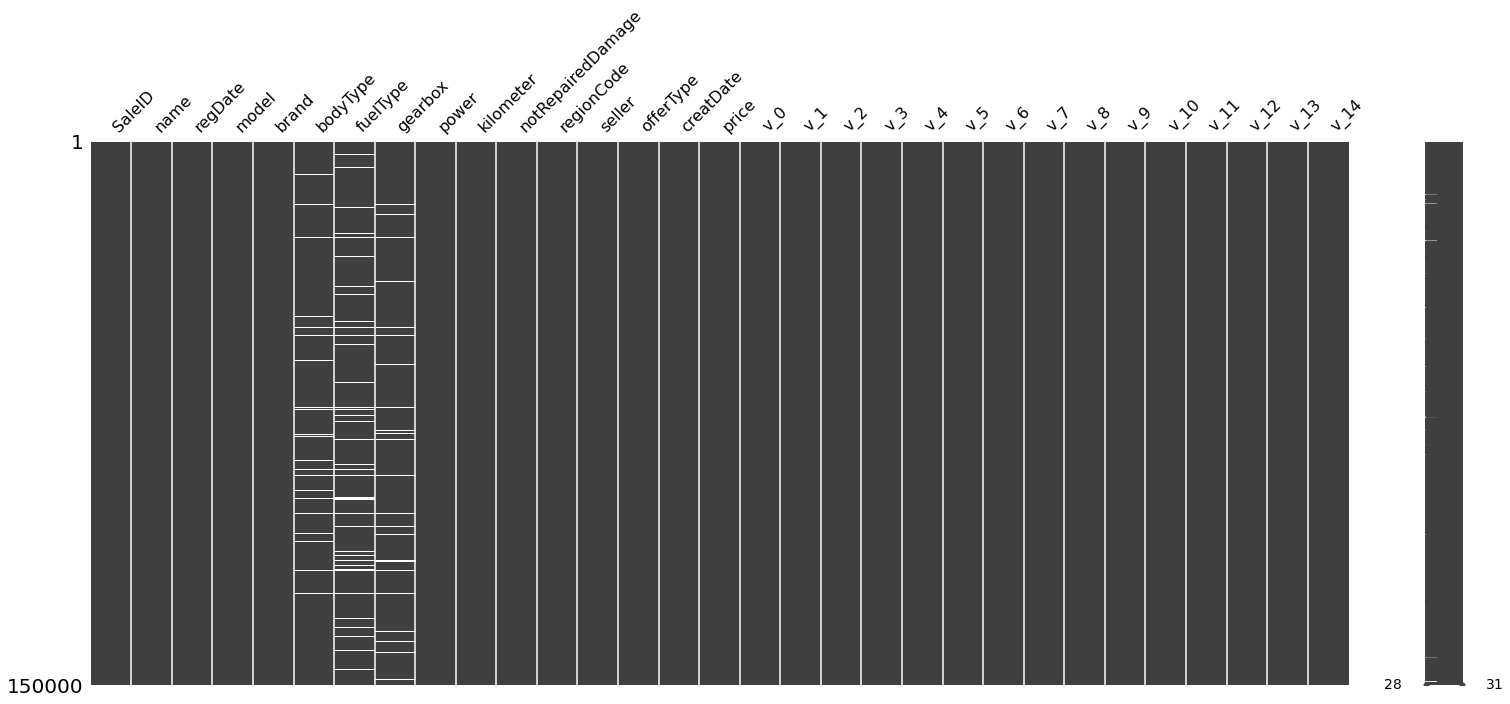

In [16]:
#缺失值的查看
import missingno as msno

msno.matrix(train.sample(150000))

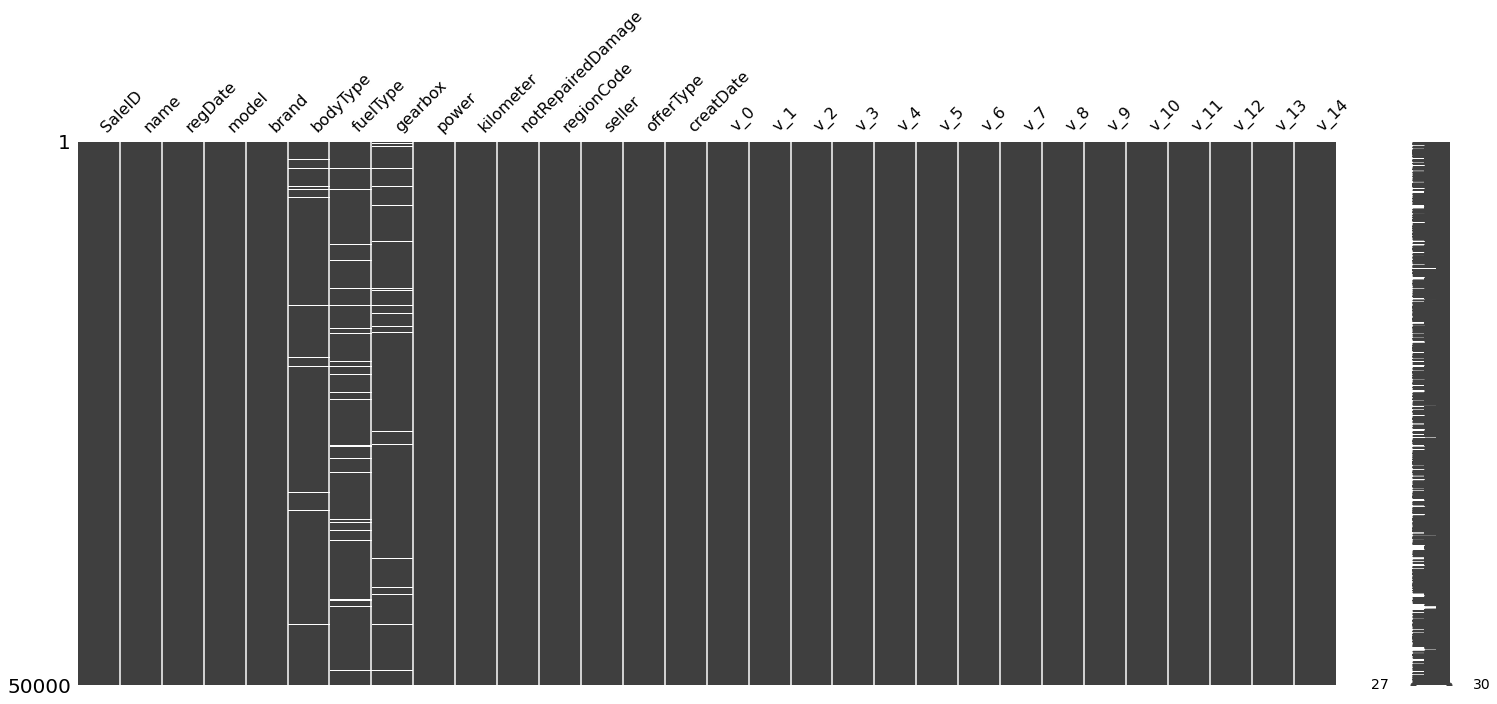

In [17]:
msno.matrix(test.sample(50000))

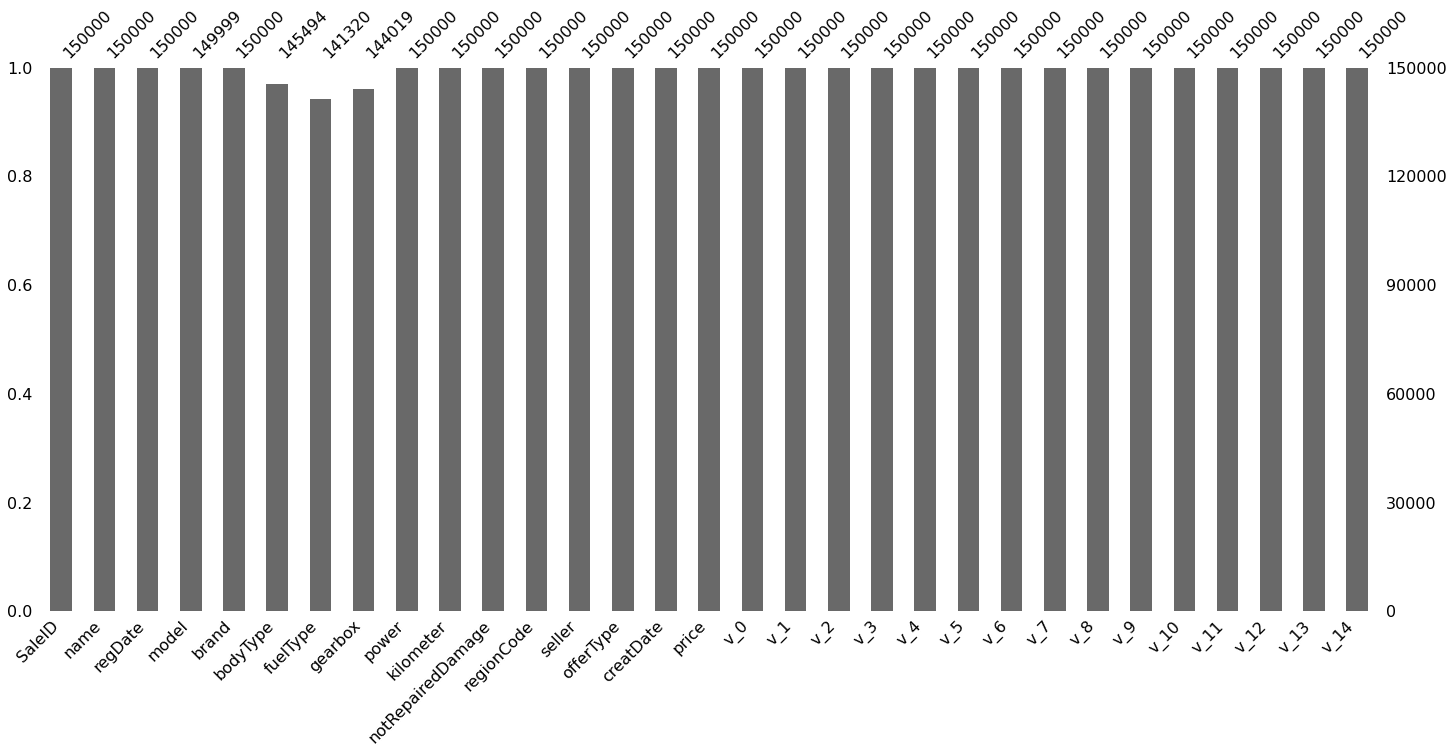

In [18]:
msno.bar(train.sample(150000))      #用这个查看很方便，可以大概知道缺失的数量以及占比

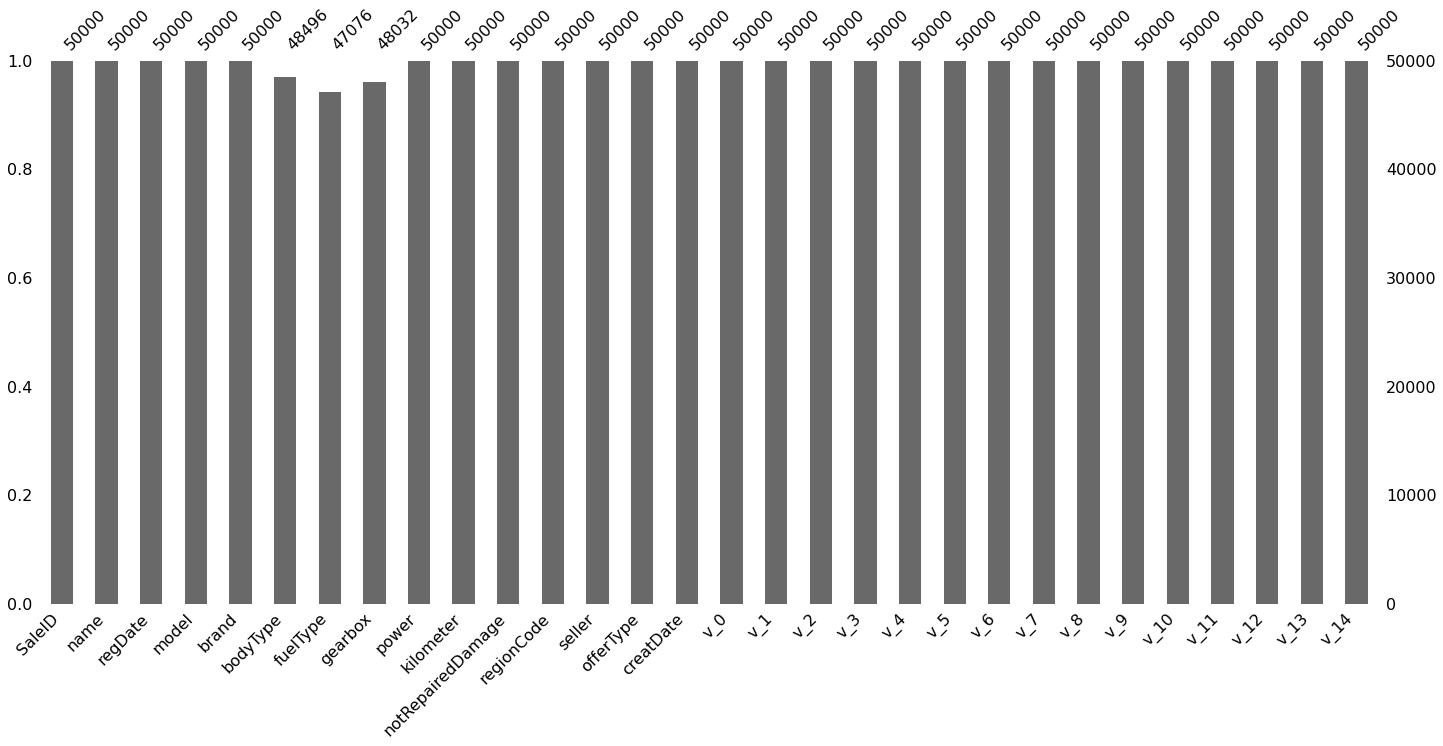

In [19]:
msno.bar(test.sample(50000))      #用这个查看很方便，可以大概知道缺失的数量以及占比

In [20]:
#另外从上述信息可以看到只有notRepairedDamage为object类型其他都为数字，查看一下其具体的数据类型
train['notRepairedDamage'].value_counts(sorted)   #可以看到其缺失的比例有16.2%

0.0    0.742407
-      0.162160
1.0    0.095433
Name: notRepairedDamage, dtype: float64

In [21]:
test['notRepairedDamage'].value_counts(sorted)   

0.0    0.74448
-      0.16138
1.0    0.09414
Name: notRepairedDamage, dtype: float64

'-' 也是异常值，因此我们用缺失值代替

In [22]:
train.replace('-', np.nan, inplace=True)  #注意要有返回值， inplace=True
test.replace('-', np.nan, inplace=True)  #注意要有返回值， inplace=True

In [23]:
#查看缺失值情况
train.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [24]:
#查看缺失值情况
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage    8069
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [25]:
#最好查看所有数据的分布情况，因为有些特征的用处其实不大，比如以下两个特征
train['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [26]:
test['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [27]:
train['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [28]:
test['offerType'].value_counts()

0    50000
Name: offerType, dtype: int64

In [29]:
#所以这两列特征好像没有太大的必要性，可以删掉
del train["seller"]
del train["offerType"]
del test["seller"]
del test["offerType"]

以上简单了解了一下缺失值和异常值的情况

In [30]:
#了解预测值的分布,回归问题
train['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

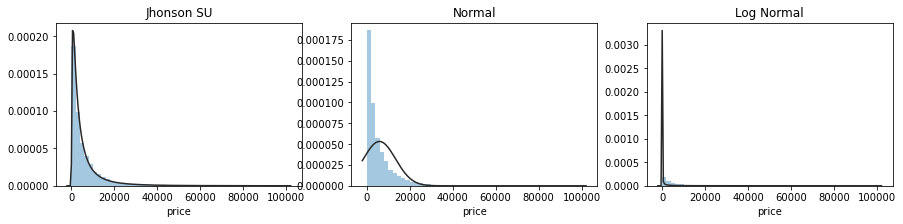

In [31]:
#总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = train['price']

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.title('Jhonson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.subplot(132)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.subplot(133)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


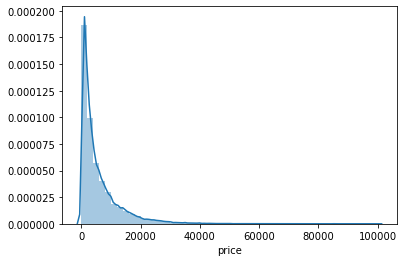

In [32]:
#查看skewness和kurtosis
sns.distplot(train['price'])
#偏度，是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度，数值越大，不对称升读越大，Skewness = 0 ，分布形态与正态分布偏度相同
print('Skewness: %f' % train['price'].skew())  
#峰度，偏度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度，Kurtosis=0 与正态分布的陡缓程度相同
print('Kurtosis: %f' % train['price'].kurt())

In [33]:
#查看所有变量的skew以及kurt
pd.DataFrame({'Skew': train.skew()})

,Skew
SaleID,6.017846e-17
name,5.576058e-01
regDate,2.849508e-02
model,1.484388e+00
brand,1.150760e+00
bodyType,9.915299e-01
fuelType,1.595486e+00
gearbox,1.317514e+00
power,6.586318e+01
kilometer,-1.525921e+00


In [34]:
pd.DataFrame({'Kurt': train.kurt()})

,Kurt
SaleID,-1.200000
name,-1.039945
regDate,-0.697308
model,1.740483
brand,1.076201
bodyType,0.206937
fuelType,5.880049
gearbox,-0.264161
power,5733.451054
kilometer,1.141934


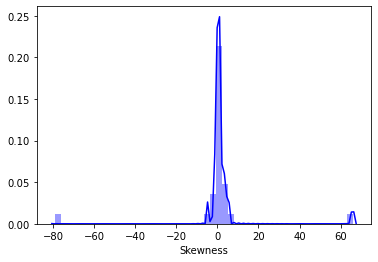

In [35]:
sns.distplot(train.skew(), color='blue', axlabel='Skewness')

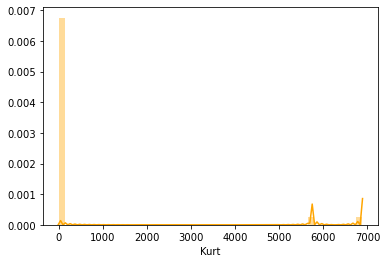

In [36]:
sns.distplot(train.kurt(), color='orange', axlabel='Kurt')

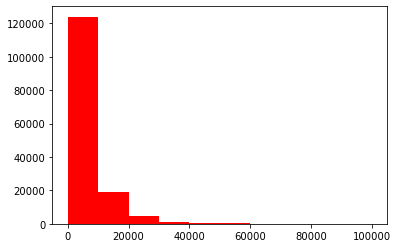

In [37]:
plt.hist(train['price'], orientation='vertical', histtype='bar', color='red')
plt.show()

对特征进行分类，数字特征，类别特征

In [38]:
#首先提取出标签信息
y_train = train['price']

In [39]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

因为下载的数据已经将类别特征转换为数字了，人为进行区分

In [40]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [41]:
for cat_fea in categorical_features:
    print('%s的特征分布如下：' % cat_fea)
    print('{}特征有{}个不同的值'.format(cat_fea, train[cat_fea].unique()))
    print(train[cat_fea].value_counts())

name的特征分布如下：
name特征有[   736   2262  14874 ... 147587  45907 177672]个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有[ 30.  40. 115. 109. 110.  24.  13.  26.  19.   7.   1.  48.  65. 138.
 105. 114.   0.   8.  78.  21.   3.   4.  31. 121.  75.  17. 107.  16.
 111.  47.   5.  44. 200. 155.  87.  20.  22.  63.  49.  29.  88.  60.
  73.  39.  23.  11.  69. 167. 199. 178. 101.   6.  10.  57.  33.  32.
  52.  46.  74.  93. 125.  41. 127. 104.  98.  68. 156. 116. 170. 160.
  85.  80. 143.  77. 166.  53.  66. 203.  14.  42. 119. 174. 177. 210.
  36. 238.  70.  58. 126.  84.  97. 108. 192.  64.  15.  95.  54. 142.
  55. 218. 222. 163.  76.  83. 122.  18. 124. 106.  59. 228. 164. 165.
 145.  94. 186. 220. 179.  67.  71.  25. 144. 212. 172. 168. 206. 152.
 123. 182.  38. 117. 132.  99. 183. 219.  62. 173.  82.  34. 102. 213.
 

In [42]:
for cat_fea in categorical_features:
    print('%s的特征分布如下：' % cat_fea)
    print('{}特征有{}个不同的值'.format(cat_fea, test[cat_fea].unique()))
    print(test[cat_fea].value_counts())

name的特征分布如下：
name特征有[133777  61206  67829 ... 132531 143405  78202]个不同的值
387       94
55        93
1541      86
708       85
203       78
          ..
97691      1
155039     1
44449      1
112034     1
105129     1
Name: name, Length: 37536, dtype: int64
model的特征分布如下：
model特征有[ 67.  19.   5.  22.  46.  37.  36.  88.  77.  30. 164.   0. 188.   4.
   8.  29.  35. 140.  31. 190. 213.   1.  48.  63.  76. 125.  21.  44.
  15.   2. 233.  66. 105.  40.  32.  65.   6. 150. 160.  14. 119. 222.
  49.  73. 172. 146.  60. 174.  26. 142.  81.  84.  13.  98.  11.  41.
 226.  16.   3.  79.  78. 104.  54.  17.  82. 107.  86.  23. 145. 116.
  80. 120. 114. 175.  69. 156.  52.  25. 113. 106.  39.  51. 101.  87.
 111.  24.   7. 208. 115.  70.  91. 149. 173.  85.  64. 151.  58. 110.
  57. 138. 161. 167. 144. 210.  43. 159.  10. 135. 158.  53. 191.  33.
 169. 152. 195. 100. 177.  94.  95. 132. 207. 238.  93. 171. 194.  47.
  75.  62.  99.  12. 130. 121.  74. 137. 102. 168. 162.  97.  96.  20.
 184. 127. 1

数字特征分析

In [43]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [44]:
#相关性分析
corr_df = train[numeric_features].corr() 
corr_df = corr_df.abs()   #只看相关性，取绝对值
corr_df

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
power,1.000000,0.019631,0.215028,0.023746,0.031487,0.185342,0.141013,0.119727,0.025648,0.060397,0.155956,0.140203,0.092717,0.122107,0.161990,0.103430,0.023808,0.219834
kilometer,0.019631,1.000000,0.225034,0.022228,0.110375,0.402502,0.214861,0.049502,0.024664,0.017835,0.407686,0.149422,0.083358,0.066542,0.370153,0.285158,0.120389,0.440519
v_0,0.215028,0.225034,1.000000,0.245049,0.452591,0.710480,0.259714,0.726250,0.243783,0.584363,0.514149,0.186243,0.582943,0.667809,0.415711,0.136938,0.039809,0.628397
v_1,0.023746,0.022228,0.245049,1.000000,0.001133,0.001915,0.000468,0.109303,0.999415,0.110806,0.298966,0.007698,0.921904,0.370445,0.087593,0.017349,0.002143,0.060914
v_2,0.031487,0.110375,0.452591,0.001133,1.000000,0.001224,0.001021,0.921857,0.023877,0.973689,0.180285,0.236164,0.274341,0.800915,0.535270,0.055376,0.013785,0.085322
v_3,0.185342,0.402502,0.710480,0.001915,0.001224,1.000000,0.001694,0.233412,0.000747,0.191278,0.933161,0.079292,0.247385,0.429777,0.811301,0.246052,0.058561,0.730946
v_4,0.141013,0.214861,0.259714,0.000468,0.001021,0.001694,1.000000,0.259739,0.011275,0.054241,0.051741,0.962928,0.071116,0.110660,0.134611,0.934580,0.178518,0.147085
v_5,0.119727,0.049502,0.726250,0.109303,0.921857,0.233412,0.259739,1.000000,0.091229,0.939385,0.010686,0.050343,0.440588,0.845954,0.258521,0.162689,0.037804,0.164317
v_6,0.025648,0.024664,0.243783,0.999415,0.023877,0.000747,0.011275,0.091229,1.000000,0.085410,0.294956,0.023057,0.917056,0.386446,0.070238,0.000758,0.003322,0.068970
v_7,0.060397,0.017835,0.584363,0.110806,0.973689,0.191278,0.054241,0.939385,0.085410,1.000000,0.028695,0.264091,0.410014,0.813175,0.385378,0.154535,0.020218,0.053024


In [45]:
corr_df['price'].sort_values(ascending=False)

price        1.000000
v_3          0.730946
v_12         0.692823
v_8          0.685798
v_0          0.628397
kilometer    0.440519
v_11         0.275320
v_10         0.246175
power        0.219834
v_9          0.206205
v_5          0.164317
v_4          0.147085
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_7          0.053024
v_14         0.035911
v_13         0.013993
Name: price, dtype: float64

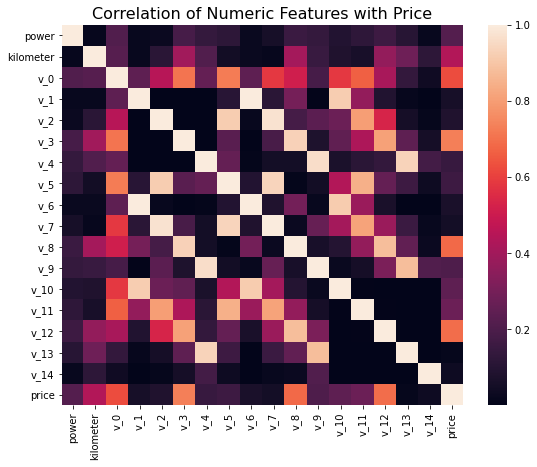

In [46]:
plt.figure(figsize=(9, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(corr_df)

代表数值的特征(连续型)一般可以用相关性矩阵来查看相关性

In [47]:
del corr_df['price']

In [48]:
for col in numeric_features:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(train[col].skew()),
         '   ',
         'Kurtosis: {:06.2f}'.format(train[col].kurt()))

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


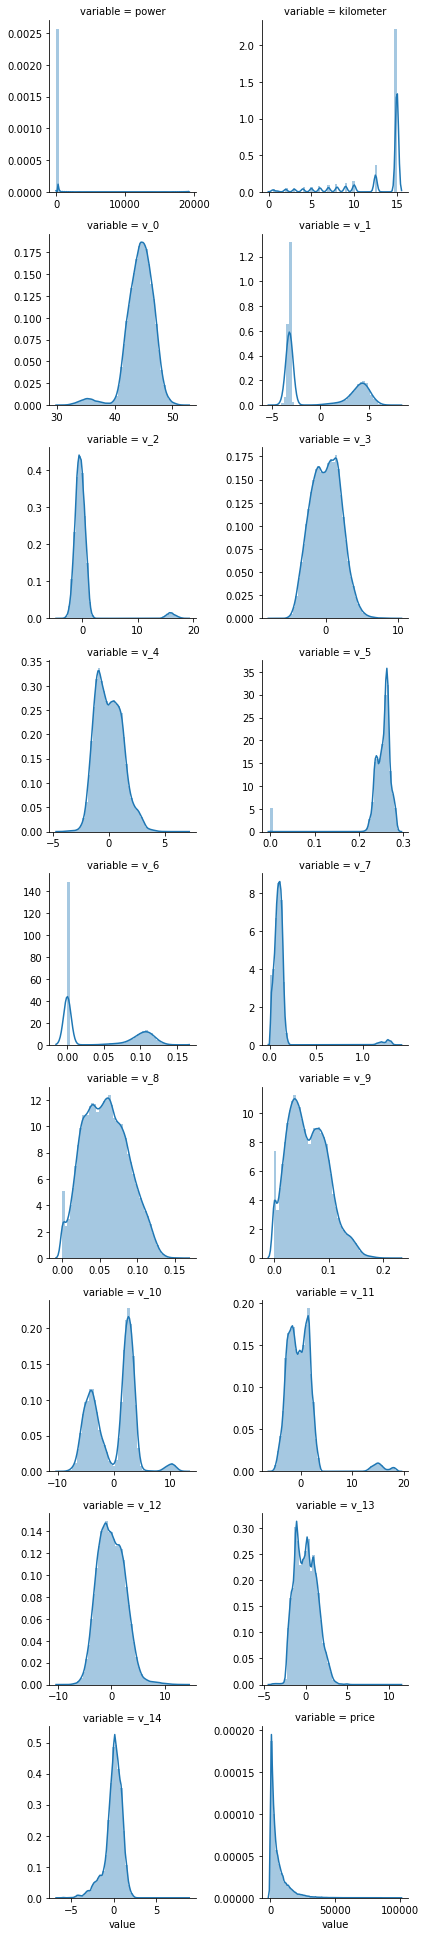

In [49]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

查看每个变量的分布

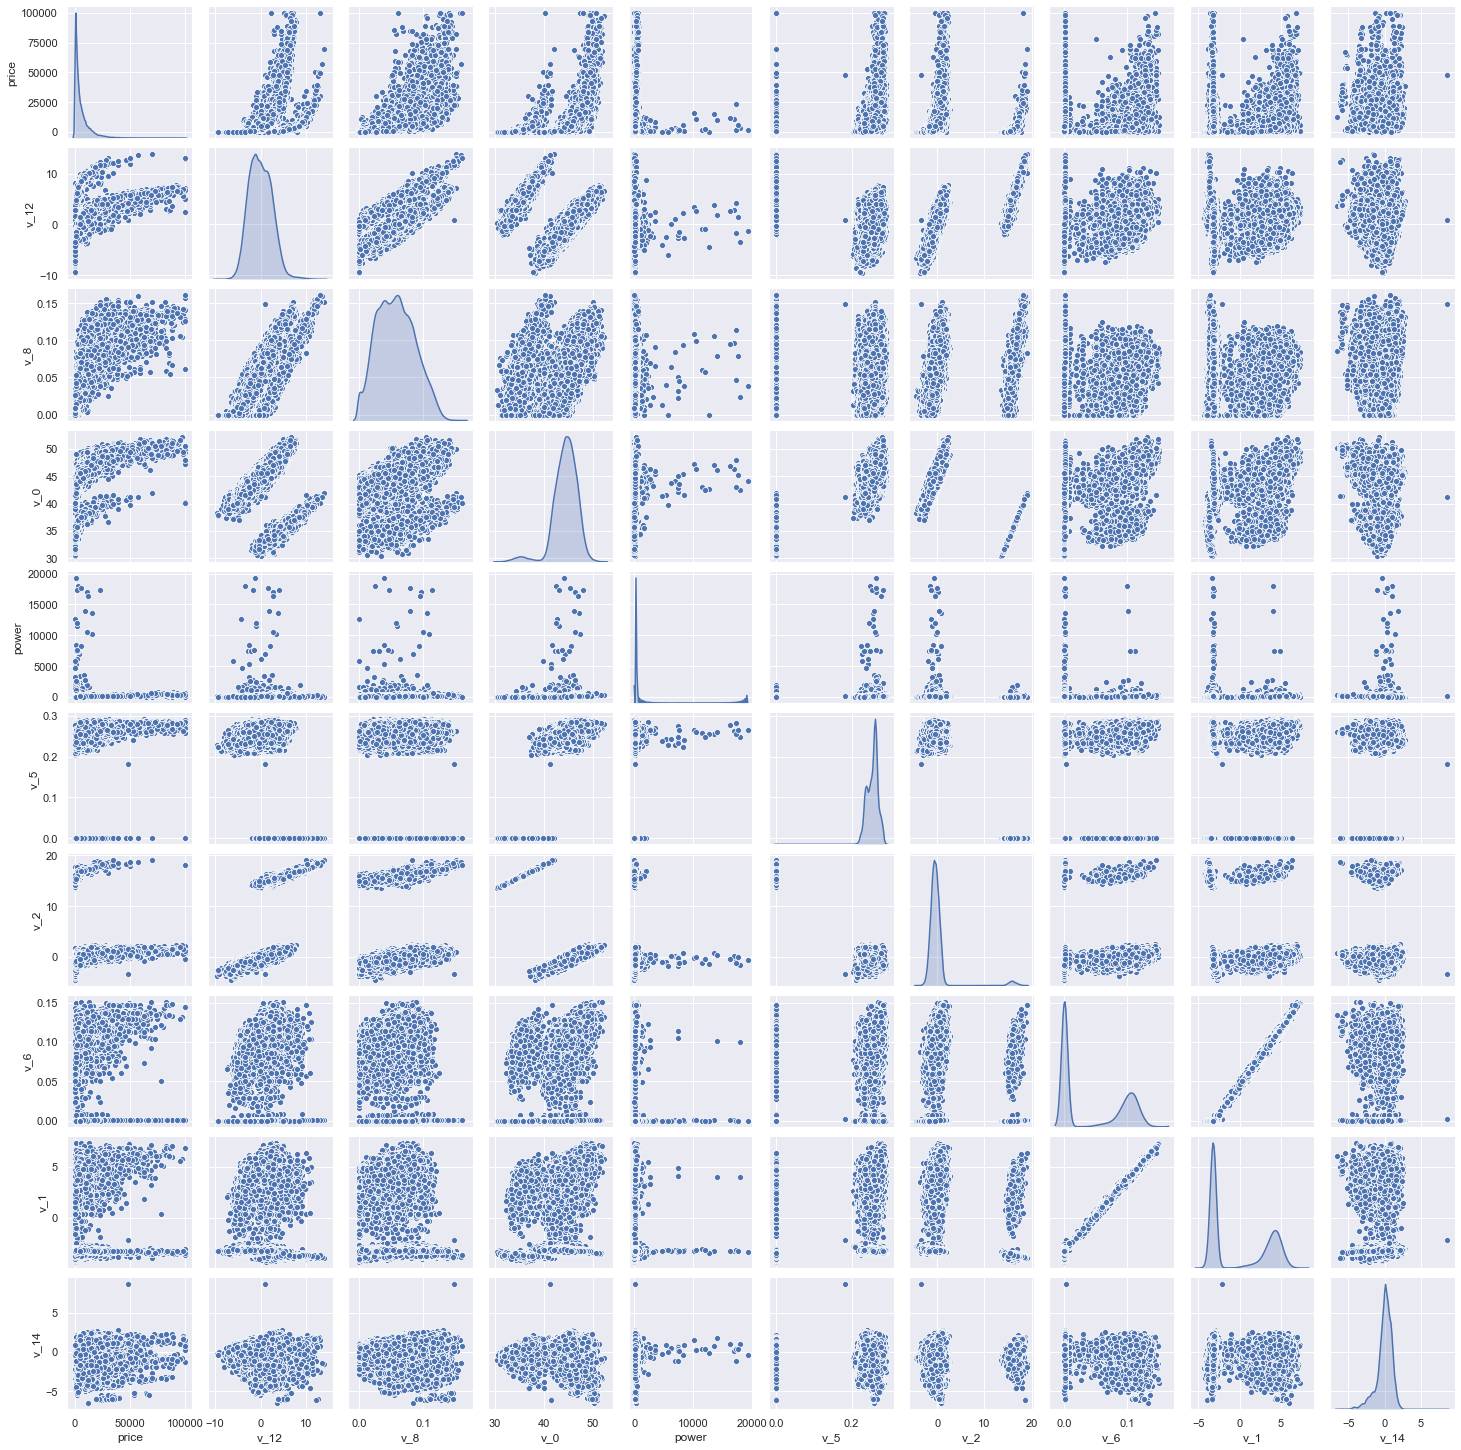

In [50]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [51]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [52]:
y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [53]:
#查看类别特征分析
for fea in categorical_features:
    print('%s: %d'% (fea, train[fea].nunique()))

name: 99662
model: 248
brand: 40
bodyType: 8
fuelType: 7
gearbox: 2
notRepairedDamage: 2
regionCode: 7905


name和regioncode特征的取值很多，是稀疏特征，所以画一下不稀疏特征的图

In [54]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [55]:
categorical_features.remove('name')

In [56]:
categorical_features.remove('regionCode')

In [57]:
#移除name和regioncode特征
categorical_features

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

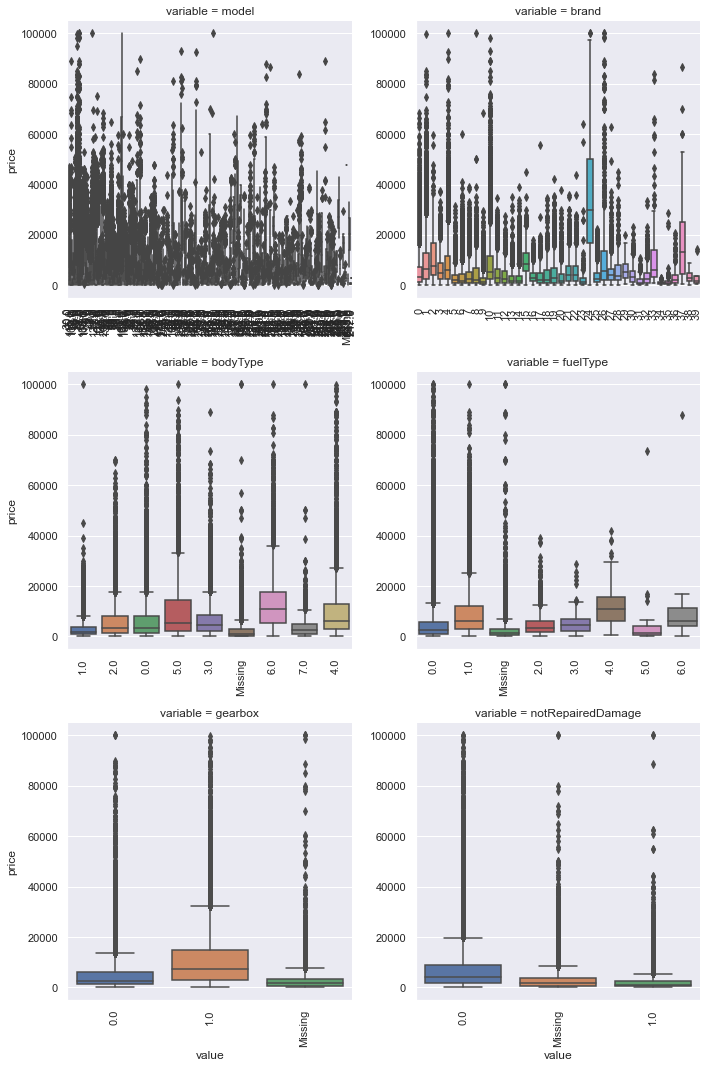

In [58]:
for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['Missing'])
        train[c] = train[c].fillna('Missing')
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value', 'price')

In [59]:
#以上是unique和boxplot，具体还有，violin，bar，countplot等描述特征的图

In [60]:
import pandas_profiling

In [61]:
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./example.html")